# **Machine Learning para Business Intelligence** 
#### Profesor: Lucas Gómez Tobón

## Clase 2. K-Vecinos más cercanos

In [1]:
# Importamos las librerías de la clase
import os
import pandas as pd
import numpy as np

In [2]:
# Definimos el directorio
os.getcwd()

'c:\\Users\\Lucas\\OneDrive - Universidad de los Andes\\Complementarias\\Proyectos de analítica en Python\\Machine Learning para Business intelligence\\Clase 3\\Script'

In [3]:
os.listdir("../Datos/")

['GOOG.csv', 'winemag-data.zip']

In [4]:
os.chdir("../Datos/")

In [5]:
# Importamos los datos
vinos = pd.read_csv('winemag-data.zip', compression = 'zip', index_col = 0)

0. Ciudad del Vino
1. Descripcion
2. Viñedo de donde provienne las uvas
3. Puntaje 1-100
4. Costo botella
5. Provincia o estado del vino
6. Desagregacion de ubicacion 1
7. Desagregacion de ubicacion 2
8. Nombre del catador
9. Twitter del catador
10. Titulo de la reseña
11. Tipo de uva para hacer el vino
12. La bodega del vino

### ¿Cómo lidiar con los NAs o missing values?
Primero vamos a identificar aquellas observaciones que son explícitamente NA

In [6]:
# Identifique qué observaciones no cuentan con información de su precio
vinos['price'].isna().head()

0     True
1    False
2    False
3    False
4    False
Name: price, dtype: bool

In [7]:
vinos.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [8]:
np.round(100*vinos.isna().mean(), 2)

country                   0.05
description               0.00
designation              28.83
points                    0.00
price                     6.92
province                  0.05
region_1                 16.35
region_2                 61.14
taster_name              20.19
taster_twitter_handle    24.02
title                     0.00
variety                   0.00
winery                    0.00
dtype: float64

Continuando con aquello que aprendimos en la clase 2, vamos a usar la técnica de K-Vecinos Más Cercanos para imputar las observaciones faltantes en el precio.

### K-Vecinos más cercanos
El algoritmo de KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión. El objetivo principal del algoritmo es clasificar un objeto nuevo en una categoría según las características de los objetos de entrenamiento más cercanos.

El proceso de clasificación con el algoritmo KNN se puede resumir en los siguientes pasos:

1. Recopilar los datos de entrenamiento: los datos de entrenamiento consisten en un conjunto de objetos con sus características y la categoría a la que pertenecen.

2. Elegir el valor de $K$: $K$ representa el número de vecinos más cercanos que se utilizarán para clasificar el objeto nuevo.

3. Calcular la distancia: se calcula la distancia entre la observación nueva y **todos** los objetos de entrenamiento en función de sus características. Hay varias formas de calcular la distancia, la más común es la distancia euclidiana.

4. Seleccionar los $K$ vecinos más cercanos: se seleccionan los K objetos de entrenamiento más cercanos al objeto nuevo en función de la distancia calculada en el paso anterior.

5. Determinar la clase de la nueva observación: se determina la clase del objeto dependiendo si estamos resolviendo un problema de regresión o clasificación. 
    - Para clasificación: se define la clase del objeto nuevo contando las categorías de los $K$ vecinos más cercanos. La clase con mayor frecuencia entre los $K$ vecinos más cercanos se asigna al objeto nuevo.
    - Para regresión: se define el valor del objeto nuevo calculando un promedio (ponderado por distancia o simple) de la variable de interés de los $k$ vecinos más cercanos.

<center>
<img src = "img/KNN.png" width = 400>
</center>

Para nuestro ejercicio, comencemos definiendo cuáles son las variables con las que queremos modelar el precio. 

En nuestro caso, nuestra única variable continua además del precio es el puntaje o calificación del vino, entonces vamos a incluir `points` en el modelo. Adicionalmente también tenemos la variable país la cual puede ser interesante, sin embargo, debemos tratarla de manera especial.

In [20]:
# El país tiene NAs
vinos[["points", "country"]].isna().sum()

points      0
country    63
dtype: int64

In [21]:
# Menos del 5%
vinos[["points", "country"]].isna().mean()

points     0.000000
country    0.000485
dtype: float64

In [22]:
# Revisemos si para los precios faltantes, también hace falta el país
vinos.loc[vinos["price"].isna(), ["points", "country", "price"]].isna().sum()

points        0
country       4
price      8996
dtype: int64

De los 64 vinos que tienen `NA` en país, solo 4 tienen `NA` tanto en país como en precio al mismo tiempo. Por consiguiente, nuestro modelo nos servirá para imputar todos los precios, menos 4, es decir 8992 observaciones. No obstante, note que país es una variable categórica y por ende debemos darle un tratamiento especial.

In [216]:
# Crearemos una base para imputar
X = vinos[["price", "points", "country"]]

In [217]:
# No podemos imputar con NAs
X = X.dropna(subset = ["country"])
idx = list(X.index)

In [218]:
idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Note que country tiene 43 categorías! No obstante, la distribución de países no es un uniforme, luego calcular distancias para países con poca representatividad puede ser problemático. Veamos este punto con una gráfica

In [219]:
X.country.unique().size

43

In [220]:
# Número de vinos por país
paises = vinos.groupby('country').size().sort_values(ascending = False).reset_index(name = "Cantidad")
paises.head()

,country,Cantidad
0,US,54504
1,France,22093
2,Italy,19540
3,Spain,6645
4,Portugal,5691


In [221]:
# Calculemos el porcentaje 
paises["Porcentaje"] = paises["Cantidad"]/paises["Cantidad"].sum()
paises.head()

,country,Cantidad,Porcentaje
0,US,54504,0.419558
1,France,22093,0.170067
2,Italy,19540,0.150414
3,Spain,6645,0.051152
4,Portugal,5691,0.043808


In [222]:
# Grafiquemos
import matplotlib.pyplot as plt
import seaborn as sns

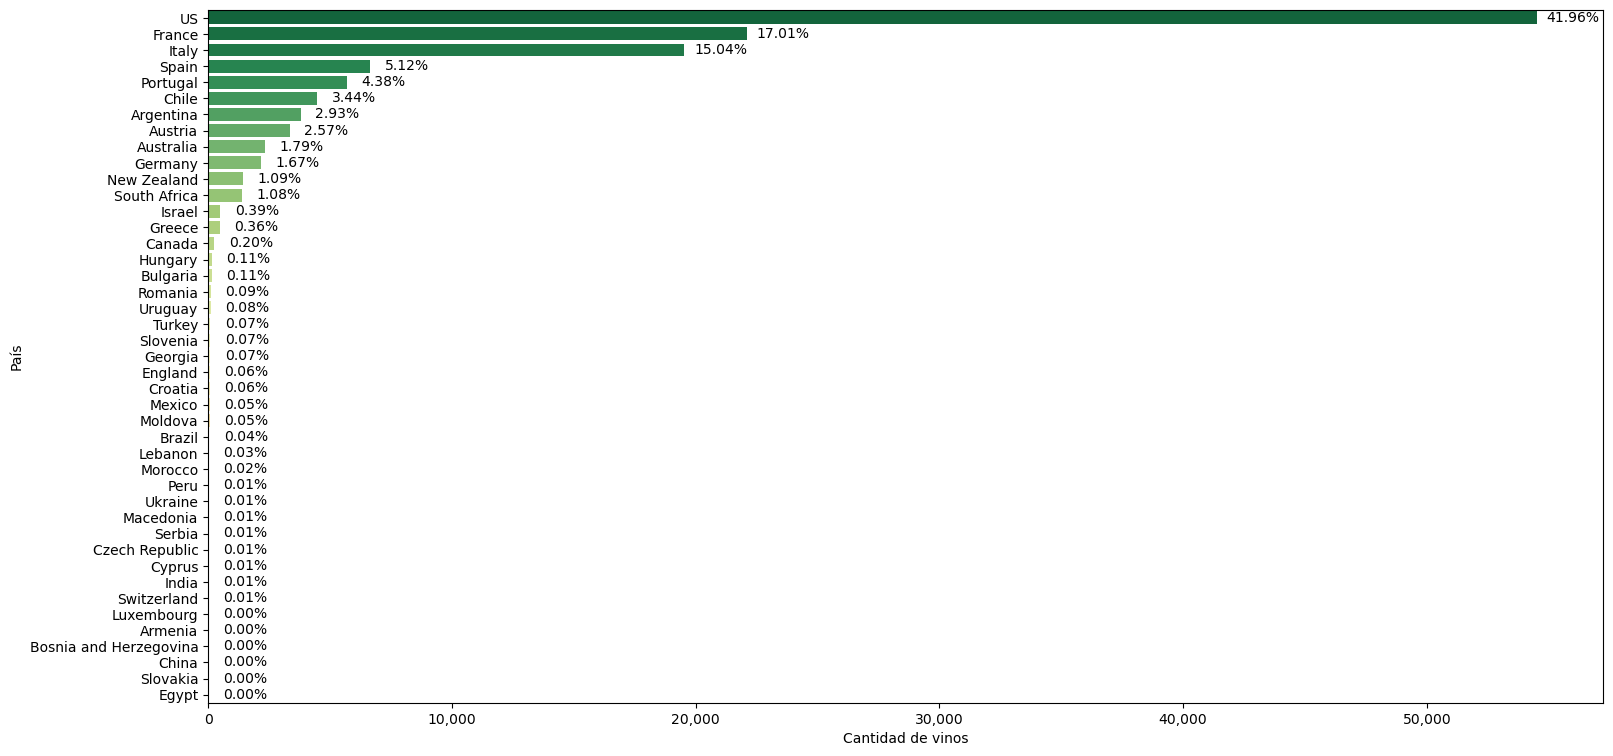

In [223]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.barplot(data = paises, x = "Cantidad", y = "country", order = paises["country"], ax = ax,
            palette = "RdYlGn_r")
plt.xlabel("Cantidad de vinos")
plt.ylabel("País")
ax.xaxis.set_major_formatter("{x:,.0f}")

# Anotación del valor de cada barra
total = paises.Cantidad.sum()
for barra in ax.patches:
    h, w = barra.get_y(), barra.get_width()
    ax.text(x = w + 1500, y = h + 0.38, s = "{:.2%}".format(w/total), # "{:,.0f}".format(w)
            ha = 'center',
            va = 'center')

In [224]:
# Calculemos el porcentaje acumulado
paises["Porcentaje acumulado"] = paises["Porcentaje"].cumsum()
paises

,country,Cantidad,Porcentaje,Porcentaje acumulado
0,US,54504,0.419558,0.419558
1,France,22093,0.170067,0.589625
2,Italy,19540,0.150414,0.740039
3,Spain,6645,0.051152,0.791191
4,Portugal,5691,0.043808,0.834999
5,Chile,4472,0.034424,0.869423
6,Argentina,3800,0.029251,0.898674
7,Austria,3345,0.025749,0.924423
8,Australia,2329,0.017928,0.942352
9,Germany,2165,0.016666,0.959017


In [225]:
paises.loc[paises["Cantidad"] < 1000, "country"] = "Otro"
paises

,country,Cantidad,Porcentaje,Porcentaje acumulado
0,US,54504,0.419558,0.419558
1,France,22093,0.170067,0.589625
2,Italy,19540,0.150414,0.740039
3,Spain,6645,0.051152,0.791191
4,Portugal,5691,0.043808,0.834999
5,Chile,4472,0.034424,0.869423
6,Argentina,3800,0.029251,0.898674
7,Austria,3345,0.025749,0.924423
8,Australia,2329,0.017928,0.942352
9,Germany,2165,0.016666,0.959017


In [226]:
# Agrupamos el otro
paises2 = paises.groupby("country")[["Cantidad", "Porcentaje"]].sum().reset_index().sort_values("Cantidad", ascending = False)
paises2

,country,Cantidad,Porcentaje
12,US,54504,0.419558
4,France,22093,0.170067
6,Italy,19540,0.150414
11,Spain,6645,0.051152
9,Portugal,5691,0.043808
3,Chile,4472,0.034424
0,Argentina,3800,0.029251
2,Austria,3345,0.025749
8,Otro,2504,0.019275
1,Australia,2329,0.017928


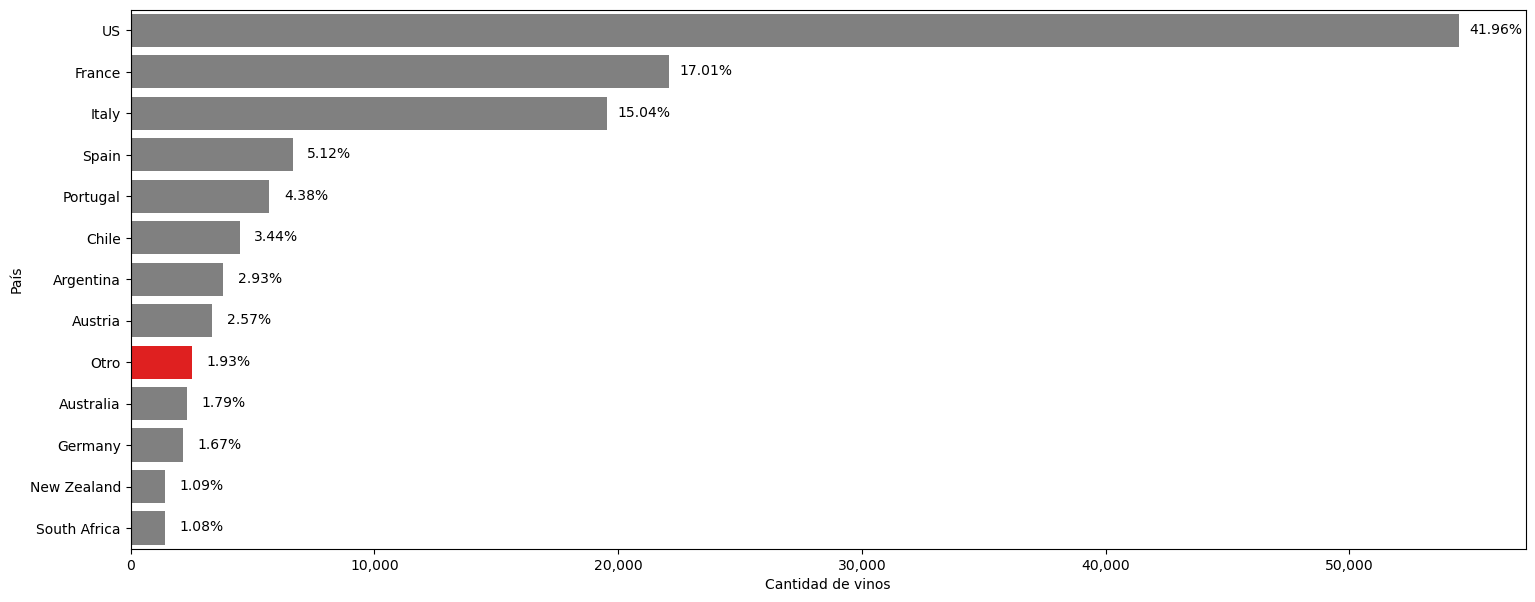

In [227]:
fig, ax = plt.subplots(figsize = (18, 7))
sns.barplot(data = paises2, x = "Cantidad", y = "country", order = paises2["country"], ax = ax,
            palette = np.where(paises2.country == "Otro", "Red", "Grey"))
plt.xlabel("Cantidad de vinos")
plt.ylabel("País")
ax.xaxis.set_major_formatter("{x:,.0f}")

# Anotación del valor de cada barra
total = paises2.Cantidad.sum()
for barra in ax.patches:
    h, w = barra.get_y(), barra.get_width()
    ax.text(x = w + 1500, y = h + 0.38, s = "{:.2%}".format(w/total), # "{:,.0f}".format(w)
            ha = 'center',
            va = 'center')

In [228]:
# Ahora vamos a hacer el cambio en nuestra base y luego vamos a dummyficar
paises_importantes = paises.country[paises.Cantidad > 1000].values
paises_importantes

array(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa'],
      dtype=object)

In [229]:
X.loc[~X.country.isin(paises_importantes), "country"] = "Otro"

In [230]:
X.country.value_counts(normalize = True)

US              0.419558
France          0.170067
Italy           0.150414
Spain           0.051152
Portugal        0.043808
Chile           0.034424
Argentina       0.029251
Austria         0.025749
Otro            0.019275
Australia       0.017928
Germany         0.016666
New Zealand     0.010923
South Africa    0.010785
Name: country, dtype: float64

In [231]:
# Vamos a dummifycar los strings
X = pd.get_dummies(X, columns = ["country"])

In [232]:
X

,price,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Otro,country_Portugal,country_South Africa,country_Spain,country_US
0,NaN,87,0,0,0,0,0,0,1,0,0,0,0,0,0
1,15.0,87,0,0,0,0,0,0,0,0,0,1,0,0,0
2,14.0,87,0,0,0,0,0,0,0,0,0,0,0,0,1
3,13.0,87,0,0,0,0,0,0,0,0,0,0,0,0,1
4,65.0,87,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,28.0,90,0,0,0,0,0,1,0,0,0,0,0,0,0
129967,75.0,90,0,0,0,0,0,0,0,0,0,0,0,0,1
129968,30.0,90,0,0,0,0,1,0,0,0,0,0,0,0,0
129969,32.0,90,0,0,0,0,1,0,0,0,0,0,0,0,0


Note que aunque todas nuestras variables son numéricas ahora, estás están en diferentes escala:

In [233]:
X.describe()

,price,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Otro,country_Portugal,country_South Africa,country_Spain,country_US
count,120916.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000
mean,35.368644,88.447047,0.029251,0.017928,0.025749,0.034424,0.170067,0.016666,0.150414,0.010923,0.019275,0.043808,0.010785,0.051152,0.419558
std,41.031052,3.040066,0.168511,0.132691,0.158386,0.182317,0.375693,0.128016,0.357478,0.103942,0.137491,0.204668,0.103288,0.220308,0.493489
min,4.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3300.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Para entender como funciona la distancia Euclideana, hagamos unos ejemplos

In [234]:
ejemplo = vinos.loc[[0, 1, 2, 3, 129967, 129968], ["points", "country"]]
ejemplo

,points,country
0,87,Italy
1,87,Portugal
2,87,US
3,87,US
129967,90,US
129968,90,France


Calculemos la distancia entre el vino 0 (`points = 87` y `country = Italy`) con el vino 1 (`points = 87` y `country = Portugal`). Recordemos que la formula de la distancia euclideana es:

$$D_{euclideana}(x_i, x_j) = \sqrt{\sum_{k = 1}^K(x_{ik}-x_{jk})^2}$$

En donde $x_i$ y $x_j$ se refieren a la observación $i$ y la observación $j$ de la base de datos $X$ y $k$ se refiere a la columna o variable $k$ de $K$ columnas disponibles. Por ende, podemos re escribir la formula para nuestro problema como:

$$D_{euclideana}(vino_0, vino_1) = \sqrt{\sum_{k \in \{points, country\}}(vino_{0k}-vino_{1k})^2}$$
$$D_{euclideana}(vino_0, vino_1) = \sqrt{(points_0 - points_1)^2 + (country_0 - country_1)^2}$$
$$D_{euclideana}(vino_0, vino_1) = \sqrt{(87 - 87)^2 + (Italy - Portugal)^2}$$

Dado que dumificamos los países podríamos decir que la distancia final es:
$$D_{euclideana}(vino_0, vino_1) = \sqrt{2}$$

In [249]:
# Programemos el paso a paso
vino0 = X.drop(columns = ["price"]).loc[0,:]
vino1 = X.drop(columns = ["price"]).loc[1,:]

vino0

points                  87
country_Argentina        0
country_Australia        0
country_Austria          0
country_Chile            0
country_France           0
country_Germany          0
country_Italy            1
country_New Zealand      0
country_Otro             0
country_Portugal         0
country_South Africa     0
country_Spain            0
country_US               0
Name: 0, dtype: int64

In [250]:
vino1

points                  87
country_Argentina        0
country_Australia        0
country_Austria          0
country_Chile            0
country_France           0
country_Germany          0
country_Italy            0
country_New Zealand      0
country_Otro             0
country_Portugal         1
country_South Africa     0
country_Spain            0
country_US               0
Name: 1, dtype: int64

In [251]:
np.sqrt(np.sum((vino0 - vino1)**2))

1.4142135623730951

In [252]:
# Ahora usemos un comando automático para ver la distancia entre todas las observaciones de nuestro ejemplo
ejemplo

,points,country
0,87,Italy
1,87,Portugal
2,87,US
3,87,US
129967,90,US
129968,90,France


In [253]:
ejemplo_X = X.loc[ejemplo.index,:].drop(columns = ["price"])
ejemplo_X

,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Otro,country_Portugal,country_South Africa,country_Spain,country_US
0,87,0,0,0,0,0,0,1,0,0,0,0,0,0
1,87,0,0,0,0,0,0,0,0,0,1,0,0,0
2,87,0,0,0,0,0,0,0,0,0,0,0,0,1
3,87,0,0,0,0,0,0,0,0,0,0,0,0,1
129967,90,0,0,0,0,0,0,0,0,0,0,0,0,1
129968,90,0,0,0,0,1,0,0,0,0,0,0,0,0


In [254]:
from scipy.spatial import distance_matrix
ejemplo_d = distance_matrix(ejemplo_X, ejemplo_X)
ejemplo_d

array([[0.        , 1.41421356, 1.41421356, 1.41421356, 3.31662479,
        3.31662479],
       [1.41421356, 0.        , 1.41421356, 1.41421356, 3.31662479,
        3.31662479],
       [1.41421356, 1.41421356, 0.        , 0.        , 3.        ,
        3.31662479],
       [1.41421356, 1.41421356, 0.        , 0.        , 3.        ,
        3.31662479],
       [3.31662479, 3.31662479, 3.        , 3.        , 0.        ,
        1.41421356],
       [3.31662479, 3.31662479, 3.31662479, 3.31662479, 1.41421356,
        0.        ]])

In [255]:
nombres = ["vino" + str(i) for i in ejemplo.index]

In [256]:
ejemplo_d = pd.DataFrame(ejemplo_d, columns = nombres, index = nombres)
ejemplo_d

,vino0,vino1,vino2,vino3,vino129967,vino129968
vino0,0.000000,1.414214,1.414214,1.414214,3.316625,3.316625
vino1,1.414214,0.000000,1.414214,1.414214,3.316625,3.316625
vino2,1.414214,1.414214,0.000000,0.000000,3.000000,3.316625
vino3,1.414214,1.414214,0.000000,0.000000,3.000000,3.316625
vino129967,3.316625,3.316625,3.000000,3.000000,0.000000,1.414214
vino129968,3.316625,3.316625,3.316625,3.316625,1.414214,0.000000


<AxesSubplot:>

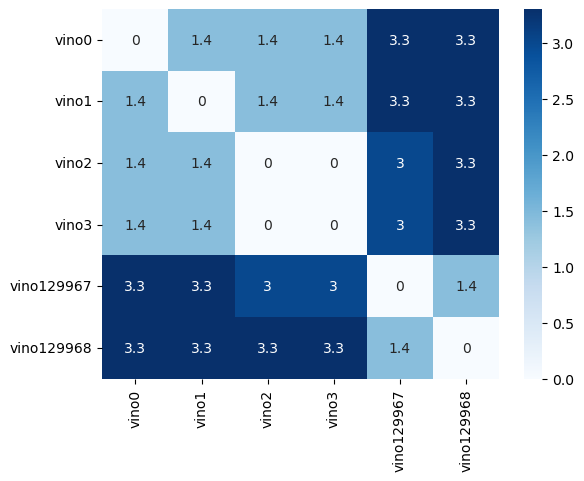

In [257]:
sns.heatmap(ejemplo_d, cmap = 'Blues', vmin = 0, vmax = 3.3, annot = True)

- Note que el vino 0 está a la misma distancia de los vinos 1, 2, 3
- Note que las distancias son simétricas.
- Note que la distancia a mi mismo es 0. Luego cero es la mínima distancia posible.

In [258]:
vinos.loc[ejemplo.index, ["points", "country", "price"]]

,points,country,price
0,87,Italy,NaN
1,87,Portugal,15.0
2,87,US,14.0
3,87,US,13.0
129967,90,US,75.0
129968,90,France,30.0


¿Qué pasaría si pusieramos todas las variables en la misma escala y repitieramos el procedimiento?

Cuando hablamos de escala nos referimos al dominio de una variable, es decir cuál es el valor mínimo y el valor máximo de cada variable. Por ejemplo, la escala de las variables de país es entre 0 y 1 pues son variables dicótomas, sin embargo, la escala de la variable puntos es de 80 a 100. 

Para escalar los valores de una variable numérica continua en el rango $[a, b]$ podríamos utilizar la técnica de escalado Min-Max la cual es:

$X_{sc} = \frac{(X - X_{min})}{(X_{max} - X_{min})} \cdot (b - a) + a$

donde:
- $X_{sc}$ es el valor escalado de la variable $X$
- $X$ es el valor original de la variable $X$
- $X_{min}$ es el valor mínimo de $X$ en el conjunto de datos original
- $X_{max}$ es el valor máximo de $X$ en el conjunto de datos original
- $a$ y $b$ son los límites inferior y superior del rango de valores a los que se quiere escalar $X$ (por ejemplo, $a=0$ y $b=1$ para escalar en el rango $[0, 1]$).

In [264]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index = X.index)
X_scaled

,price,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Otro,country_Portugal,country_South Africa,country_Spain,country_US
0,NaN,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003337,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.003034,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.002731,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.018507,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0.007282,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129967,0.021541,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129968,0.007888,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129969,0.008495,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
X_scaled.describe()

,price,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Otro,country_Portugal,country_South Africa,country_Spain,country_US
count,120916.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000,129908.000000
mean,0.009517,0.422352,0.029251,0.017928,0.025749,0.034424,0.170067,0.016666,0.150414,0.010923,0.019275,0.043808,0.010785,0.051152,0.419558
std,0.012449,0.152003,0.168511,0.132691,0.158386,0.182317,0.375693,0.128016,0.357478,0.103942,0.137491,0.204668,0.103288,0.220308,0.493489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003944,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.006371,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.011529,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [266]:
ejemplo_X2 = X_scaled.loc[ejemplo.index,:].drop(columns = "price")
ejemplo_X2

,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Otro,country_Portugal,country_South Africa,country_Spain,country_US
0,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129967,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129968,0.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
ejemplo_d2 = distance_matrix(ejemplo_X2, ejemplo_X2)
ejemplo_d2

array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.42214627,
        1.42214627],
       [1.41421356, 0.        , 1.41421356, 1.41421356, 1.42214627,
        1.42214627],
       [1.41421356, 1.41421356, 0.        , 0.        , 0.15      ,
        1.42214627],
       [1.41421356, 1.41421356, 0.        , 0.        , 0.15      ,
        1.42214627],
       [1.42214627, 1.42214627, 0.15      , 0.15      , 0.        ,
        1.41421356],
       [1.42214627, 1.42214627, 1.42214627, 1.42214627, 1.41421356,
        0.        ]])

In [268]:
ejemplo_d2 = pd.DataFrame(ejemplo_d2, columns = nombres, index = nombres)
ejemplo_d2

,vino0,vino1,vino2,vino3,vino129967,vino129968
vino0,0.000000,1.414214,1.414214,1.414214,1.422146,1.422146
vino1,1.414214,0.000000,1.414214,1.414214,1.422146,1.422146
vino2,1.414214,1.414214,0.000000,0.000000,0.150000,1.422146
vino3,1.414214,1.414214,0.000000,0.000000,0.150000,1.422146
vino129967,1.422146,1.422146,0.150000,0.150000,0.000000,1.414214
vino129968,1.422146,1.422146,1.422146,1.422146,1.414214,0.000000


Text(0.5, 1.0, 'Distancia euclideana escalando')

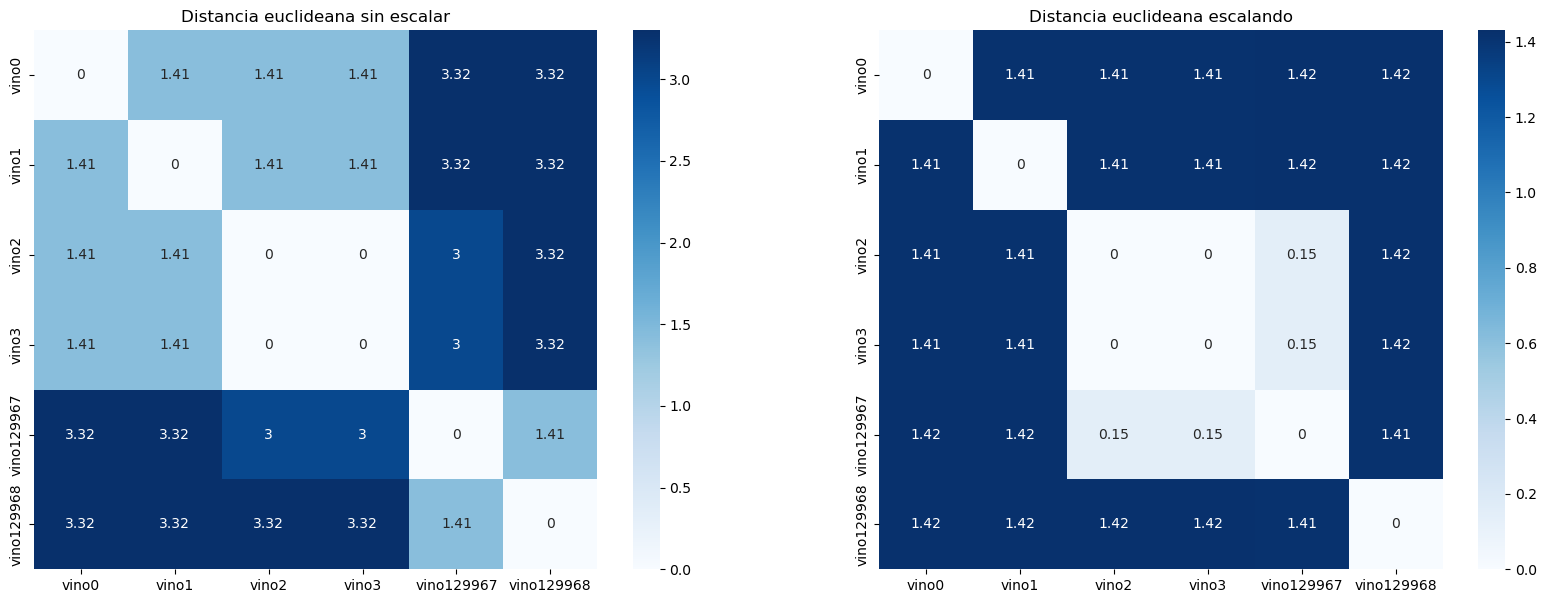

In [269]:
# Comparemos
fig, axs = plt.subplots(figsize = (20, 7), ncols = 2) 
sns.heatmap(ejemplo_d, cmap = 'Blues', vmin = 0, vmax = 3.3, annot = True, fmt = ".3g", ax = axs[0])
axs[0].set_title("Distancia euclideana sin escalar")
sns.heatmap(ejemplo_d2, cmap = 'Blues', vmin = 0, vmax = 1.43, annot = True, fmt = ".3g", ax = axs[1])
axs[1].set_title("Distancia euclideana escalando")

¿Escalar estuvo bien o estuvo mal? Depende!
En este caso, el **orden** de distancia entre vinos se mantuvo igual. Sin embargo, las disparidades entre vinos se hicieron más pequeñas! La escala de las variables impacta el peso que se le asigna a cada una de las variables en el análisis.

Ahora sí, sin más rodeos, apliquemos KNN.

In [270]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 7)
X_imputed = imputer.fit_transform(X)

In [271]:
X_imputed = pd.DataFrame(X_imputed, columns = X.columns)

In [272]:
X_imputed = X_imputed.rename(columns = {"price": "price_knn"})
X_imputed

,price_knn,points,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Otro,country_Portugal,country_South Africa,country_Spain,country_US
0,21.142857,87.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.000000,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,14.000000,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,13.000000,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,65.000000,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129903,28.000000,90.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129904,75.000000,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129905,30.000000,90.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129906,32.000000,90.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [280]:
vinos["price_knn"] = np.nan

In [281]:
vinos.loc[idx, "price_knn"] = X_imputed["price_knn"].values

In [283]:
vinos[["country", "points", "price", "price_knn"]]

,country,points,price,price_knn
0,Italy,87,NaN,21.142857
1,Portugal,87,15.0,15.000000
2,US,87,14.0,14.000000
3,US,87,13.0,13.000000
4,US,87,65.0,65.000000
...,...,...,...,...
129966,Germany,90,28.0,28.000000
129967,US,90,75.0,75.000000
129968,France,90,30.0,30.000000
129969,France,90,32.0,32.000000


## Clase 3. Modelos lineales

### 0. Introducción a Scikit-Learn

Existen varias librerías de Python que proveen implementaciones sólidas de multiples algoritmos de aprendizaje de máquinas. Una de las más conocidas es [Scikit-Learn](http://scikit-learn.org). Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, y por tener una documentación en línea muy útil y completa. Una ventaja de esta uniformidad es que una vez que comprende el uso básico y la sintaxis de Scikit-Learn para un tipo de modelo, cambiar a un nuevo modelo o algoritmo es muy sencillo.

#### Uso básico de la API

Por lo general, los pasos a seguir para utilizar los modelos implementados en Scikit-Learn son:

1. Seleccionar una clase de modelo importando la clase de estimador apropiada de Scikit-Learn.
2. Seleccionar los hiper parámetros del modelo al instanciar la clase anterior con estos valores.
3. Organizar los datos en una matriz de variables y un vector objetivo.
4. Ajustar el modelo a los datos llamando al método `` fit () `` de la instancia del modelo.
5. Evaluar el modelo en nuevos datos.

In [294]:
# Generar datos sintéticos usando semilla
rng = np.random.RandomState(666)

In [296]:
rng.randn(50)

array([-0.1963061 ,  1.51814514,  0.07722188, -0.06399132,  0.94592341,
        1.20409101, -0.45124074, -1.58744651, -1.86885548,  0.10037737,
       -3.09487059,  3.39351678, -0.12666878, -0.93713026,  0.56552529,
        0.3158975 , -0.79572225,  0.50507572,  0.32482413,  0.9608153 ,
        0.03026866,  0.57605275, -0.06992037,  0.64549479, -0.6055902 ,
        1.7392511 ,  0.71150415, -0.17065005,  0.80013002,  0.67775509,
       -0.95042859, -0.05707663,  0.35951076,  0.52294566, -0.91395899,
       -0.5849493 , -0.58392371, -0.00718163, -1.94296661, -0.22020228,
       -1.57051763, -0.18626694,  0.26641671, -0.60911546, -1.08081421,
        1.56980823, -0.09154531, -0.89693179,  1.1333561 ,  1.72204708])

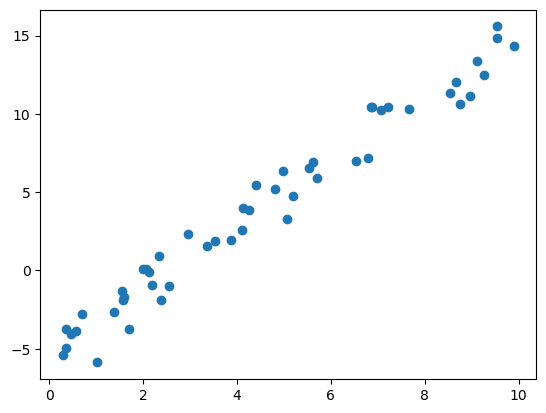

In [300]:
# Generamos puntos distribuidos de manera uniforme entre 0 y 10, (vector de 50 filas por 1 columna)
x = 10 * rng.rand(50,1)

# Generamos los valores de y usando un modelo lineal con pendiente 2 e intercepto -5 mas un ruido alatorio
y = 2*x[:,0] - 5 + rng.randn(50)

# Visualicemos y e x
plt.scatter(x,y)

#### Encontrar el mejor ajuste utilizando Scikit-Learn

In [302]:
from sklearn.linear_model import LinearRegression

In [303]:
# Crear un modelo lineal con intercepto
modelo = LinearRegression(fit_intercept = True)

# Ajustar el modelo a los datos
modelo.fit(x, y)

LinearRegression()

In [310]:
# Graficar la funcion lineal estimada

# np.linspace() me genera, en este caso, 1000 número equidistantes entre 0 y 10
# El número de datos que deseo, y desde qué numero y hasta qué numero son personalizables a mis necesidades
x_teorico = np.linspace(0, 10, 1000)

x_teorico.shape

(1000,)

In [311]:
x.shape

(50, 1)

En Python, la función `.reshape()` se utiliza para cambiar la forma (shape) de un array o matriz NumPy. El argumento que se pasa a la función `.reshape()` especifica la nueva forma deseada del array.

En el caso de .`reshape(-1, 1)`, "-1" se utiliza como un comodín que significa "infiera automáticamente la dimensión desconocida". Esto significa que la función `.reshape()` ajustará automáticamente la dimensión del array de entrada en función de la forma deseada, garantizando que la cantidad total de elementos sea la misma que la del array original.

La segunda parte, ", 1", se utiliza para indicar que se desea una matriz de una sola columna. Esto significa que la función `.reshape()` ajustará la forma del array para tener una sola columna, pero mantendrá la misma cantidad total de elementos que el array original.

En resumen, .`reshape(-1, 1)` se utiliza para cambiar la forma de un array NumPy para que tenga una sola columna, manteniendo la misma cantidad total de elementos que el array original.

In [313]:
x_teorico.reshape(-1, 1).shape

(1000, 1)

In [312]:
x_teorico.reshape(-1,1)

array([[ 0.        ],
       [ 0.01001001],
       [ 0.02002002],
       [ 0.03003003],
       [ 0.04004004],
       [ 0.05005005],
       [ 0.06006006],
       [ 0.07007007],
       [ 0.08008008],
       [ 0.09009009],
       [ 0.1001001 ],
       [ 0.11011011],
       [ 0.12012012],
       [ 0.13013013],
       [ 0.14014014],
       [ 0.15015015],
       [ 0.16016016],
       [ 0.17017017],
       [ 0.18018018],
       [ 0.19019019],
       [ 0.2002002 ],
       [ 0.21021021],
       [ 0.22022022],
       [ 0.23023023],
       [ 0.24024024],
       [ 0.25025025],
       [ 0.26026026],
       [ 0.27027027],
       [ 0.28028028],
       [ 0.29029029],
       [ 0.3003003 ],
       [ 0.31031031],
       [ 0.32032032],
       [ 0.33033033],
       [ 0.34034034],
       [ 0.35035035],
       [ 0.36036036],
       [ 0.37037037],
       [ 0.38038038],
       [ 0.39039039],
       [ 0.4004004 ],
       [ 0.41041041],
       [ 0.42042042],
       [ 0.43043043],
       [ 0.44044044],
       [ 0

In [314]:
yfit = modelo.predict(x_teorico.reshape(-1,1))
yfit

array([-5.10266095e+00, -5.08253670e+00, -5.06241245e+00, -5.04228820e+00,
       -5.02216396e+00, -5.00203971e+00, -4.98191546e+00, -4.96179121e+00,
       -4.94166696e+00, -4.92154271e+00, -4.90141847e+00, -4.88129422e+00,
       -4.86116997e+00, -4.84104572e+00, -4.82092147e+00, -4.80079722e+00,
       -4.78067298e+00, -4.76054873e+00, -4.74042448e+00, -4.72030023e+00,
       -4.70017598e+00, -4.68005173e+00, -4.65992748e+00, -4.63980324e+00,
       -4.61967899e+00, -4.59955474e+00, -4.57943049e+00, -4.55930624e+00,
       -4.53918199e+00, -4.51905775e+00, -4.49893350e+00, -4.47880925e+00,
       -4.45868500e+00, -4.43856075e+00, -4.41843650e+00, -4.39831226e+00,
       -4.37818801e+00, -4.35806376e+00, -4.33793951e+00, -4.31781526e+00,
       -4.29769101e+00, -4.27756676e+00, -4.25744252e+00, -4.23731827e+00,
       -4.21719402e+00, -4.19706977e+00, -4.17694552e+00, -4.15682127e+00,
       -4.13669703e+00, -4.11657278e+00, -4.09644853e+00, -4.07632428e+00,
       -4.05620003e+00, -

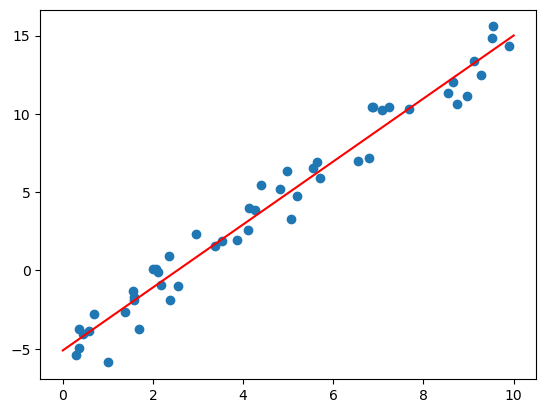

In [315]:
# Visualizamos la regresión
plt.scatter(x, y)
plt.plot(x_teorico, yfit, color = "red")

In [318]:
# Con .predict() el modelo computa el y predicho para cada uno de los x suministrados
# La predicción corresponde simplemente a y_pred = 2.01*x_pred - 5.10

print("Pendiente del modelo:", modelo.coef_[0])
print("Intercepto del modelo:", modelo.intercept_)

Pendiente del modelo: 2.0104124168763904
Intercepto del modelo: -5.102660949886199


Existen otros paquetes que contienen implementaciones de este mismo modelo como `statsmodels`

In [325]:
df = pd.DataFrame({'y': y, 'x': x.reshape(50)})
df

,y,x
0,-3.749981,1.694798
1,4.781345,5.199984
2,10.326054,7.675624
3,-0.994706,2.559251
4,5.189129,4.811432
5,-5.873148,1.009712
6,15.578401,9.541173
7,-5.404681,0.291146
8,10.426875,7.224169
9,3.293063,5.059605


In [329]:
import statsmodels.formula.api as smf

mod = smf.ols(formula = 'y ~ x', data = df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1427.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.32e-37
Time:                        15:51:14   Log-Likelihood:                -75.453
No. Observations:                  50   AIC:                             154.9
Df Residuals:                      48   BIC:                             158.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1027      0.288    -17.724      0.0

In [333]:
mod = smf.ols(formula = 'y ~ x + I(x**2)', data = df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     720.0
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           5.55e-36
Time:                        15:51:52   Log-Likelihood:                -74.722
No. Observations:                  50   AIC:                             155.4
Df Residuals:                      47   BIC:                             161.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4803      0.429    -12.760      0.0

### Ejercicios prácticos

Vamos a utilizar una base de datos muy famosa que contiene información sobre los precios de las casas en Boston y algunas covariables:

- CRIM: tasa de criminalidad per cápita por ciudad
- ZN: proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
- INDUS: proporción de acres comerciales no minoristas por ciudad
- CHAS: variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)
- NOX: concentración de óxidos nítricos (partes por 10 millones)
- RM: número medio de habitaciones por vivienda
- AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD: índice de accesibilidad a las carreteras radiales
- TAX: tasa de impuesto a la propiedad de valor total por cada $10,000
- PTRATIO: ratio alumno-profesor por municipio
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
- LSTAT: % de la población pobres
- MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [334]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep = "\s+", skiprows = 22, header = None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [342]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [343]:
# O una versión más fácil para cargar la base
from sklearn.datasets import load_boston
raw_data = load_boston()

c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [347]:
raw_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [345]:
boston = pd.DataFrame(raw_data.data)
boston.columns = raw_data.feature_names
boston['MEDV'] = raw_data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Estudiemos la relación entre el precio (`MEDV`) y el porcentaje de pobres (`LSTAT`)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

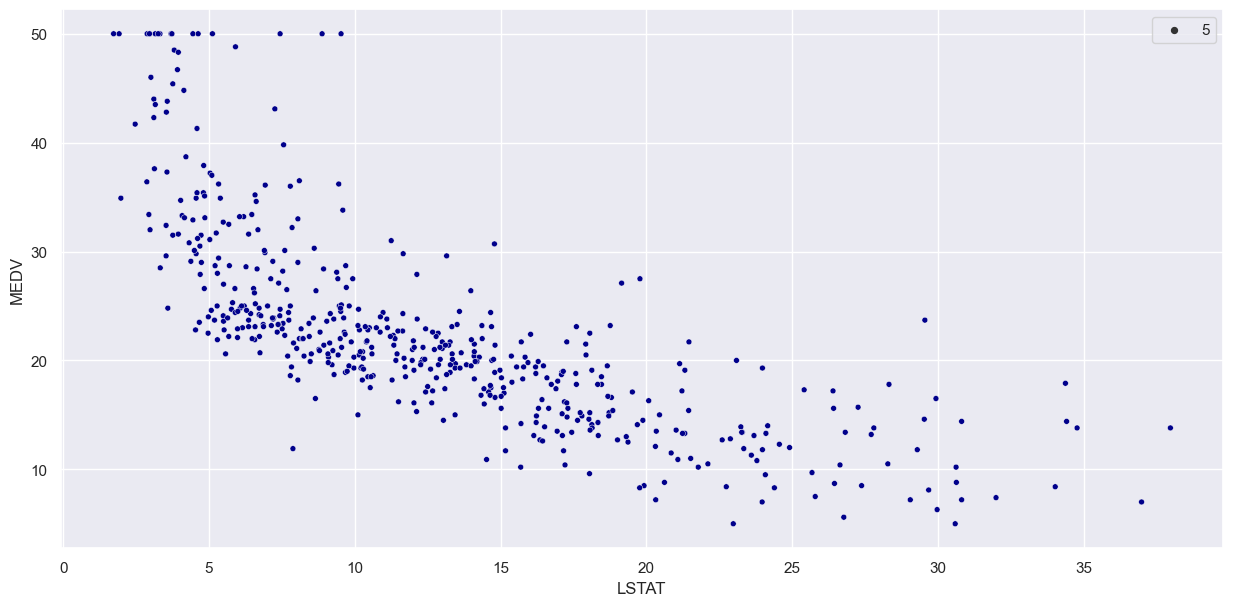

In [357]:
sns.set()
fig, ax = plt.subplots(figsize = (15, 7))
sns.scatterplot(data = boston, x = "LSTAT", y = "MEDV", color = 'darkblue', size = 5)

Entre más pobres haya en el sector, menor es el precio de la vivienda. No obstante esta relación no es lineal. Estudiemos modelos polinomiales para tratar de ajustarnos a estos datos.

### Regresión polinomial
Una manera de adaptar la regresión lineal a una relación no lineal entre las variabeles es transformar los datos de acuerdo con *funciones base*. La idea es tomar el modelo lineal multivariable:

$$y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots$$

y construir $x_1, x_2, x_3,$ del input unidimensional $x$. Tenemos entonces $x_n = f_n(x)$, donde $f_n()$ es una función que transforma nuestros datos. Por ejemplo, si $f_n(x) = x^n$, nuestro modelo se convierte en una regresión polinomial:

$$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots$$

Note que este modelo sigue siendo un *modelo lineal*. La linearidad se refiere al hecho de que los coeficientes $a_n$ son lineales entre ellos. Lo que hemos hecho es tomar la variable unidimensional $x$ y proyectarla en dimensiones mayores para que así el ajuste lineal pueda ajustar relaciones más complejas entre $x$ y $y$.

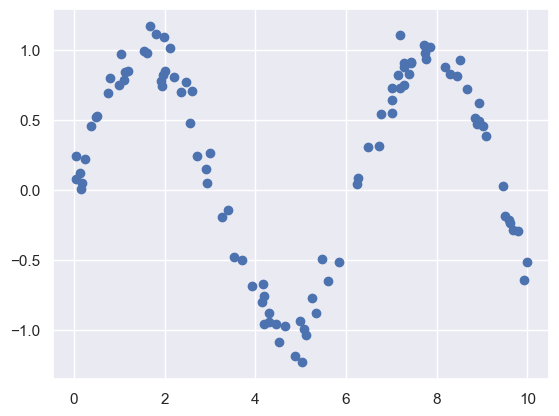

In [394]:
np.random.seed(666)

# Generamos 100 números aleatorios uniformemente distribuidos entre 0 y 10
x = 10 * np.random.rand(100)

# Generamos una variable de respuesta que no depende linealmente de x
y = np.sin(x) + 0.1 * np.random.randn(100)

# Graficamos los resultados
plt.scatter(x, y)

Ahora veamos cómo podemos hacer uso de la función `PolynomialFeatures` para tratar de crear un modelo que se ajuste a nuestros puntos.

Esta función de la biblioteca scikit-learn (`sklearn`) se utiliza para generar una matriz de características polinómicas a partir de una matriz de características original.

En otras palabras, la función `PolynomialFeatures` toma una matriz de características `X` con `n` características y genera una nueva matriz de características que consiste en todas las combinaciones posibles de características hasta un grado dado. Por ejemplo, si se establece el grado en `2`, la matriz de características resultante incluirá todas las combinaciones posibles de características de primer y segundo orden, es decir, características elevadas a la segunda potencia, características multiplicadas entre sí, etc.

Esta transformación se utiliza comúnmente en el preprocesamiento de datos para ajustar modelos de regresión no lineal a los datos. La adición de características polinómicas permite que los modelos de regresión capturen relaciones no lineales entre las características y la variable de salida.

Aquí hay un ejemplo de cómo usar `PolynomialFeatures` para generar características polinómicas de segundo orden a partir de una matriz de características `X`:

In [366]:
from sklearn.preprocessing import PolynomialFeatures

In [377]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
pd.DataFrame(X, columns = ["Var1", "Var2"])

,Var1,Var2
0,1,2
1,3,4
2,5,6
3,7,8


In [379]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
pd.DataFrame(X_poly, 
             columns = ["Polinomio de grado 0", "Var1", "Var2", "Var1 al cuadrado", "Var2 al cuadrado", "Var1 x Var2"])

,Polinomio de grado 0,Var1,Var2,Var1 al cuadrado,Var2 al cuadrado,Var1 x Var2
0,1.0,1.0,2.0,1.0,2.0,4.0
1,1.0,3.0,4.0,9.0,12.0,16.0
2,1.0,5.0,6.0,25.0,30.0,36.0
3,1.0,7.0,8.0,49.0,56.0,64.0


Veamos otro ejemplo pero con un polinomio de grado 5

In [381]:
# Creamos otros datos
X = np.array([2,3,4])
pd.DataFrame(X, columns = ["Var1"])

,Var1
0,2
1,3
2,4


In [382]:
# Definimos el objeto de tipo PolynomialFeatures.
# Le pasamos el grado máximo de los polinomios que queremos crear. 
# include_bias se refiere si queremos que se incluya el polinomio de grado 0 (una columna de 1's)
poly = PolynomialFeatures(5, include_bias = False)

In [384]:
# Con fit_transform ajustamos nuestro modelo a los datos.
# En este caso, generamos los polinomios de las variables originales
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

La manera más 'limpia' de realizar *feature engineering* en los modelos de ML es utilizando un `pipeline`. 

Un pipeline es una secuencia de pasos de preprocesamiento y modelado que se combinan en un solo objeto. Se utiliza para encadenar múltiples transformaciones y modelos en un solo flujo de trabajo.

Un pipeline consta de dos o más componentes que se combinan en una secuencia. Cada componente puede ser un objeto de transformación, como `StandardScaler` para estandarizar los datos, o un estimador, como `LinearRegression` para ajustar un modelo de regresión.

El objeto de pipeline se puede usar como cualquier otro estimador de sklearn, es decir, se puede ajustar (`fit`) al conjunto de entrenamiento, y luego se puede utilizar para hacer predicciones (`predict`) en un conjunto de prueba.

Un pipeline es útil porque simplifica la implementación de los pasos de preprocesamiento y modelado, ya que evita tener que realizar transformaciones por separado en los datos de entrenamiento y prueba. En lugar de ello, el pipeline aplica automáticamente todas las transformaciones en los datos de entrenamiento y prueba de manera coherente.

En nuestro caso vamos a hacer un pipeline de dos pasos: primero crear un polinomio de grado 7 sobre unos datos y luego ajustar una regresión. para hacerlo utilizaremos la función `make_pipeline`.

In [385]:
from sklearn.pipeline import make_pipeline

# Definimos el pipeline:
# Primero generamos variables polinomiales hasta grado 7
# Y luego hacemos una regresión lineal con las variables creadas
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

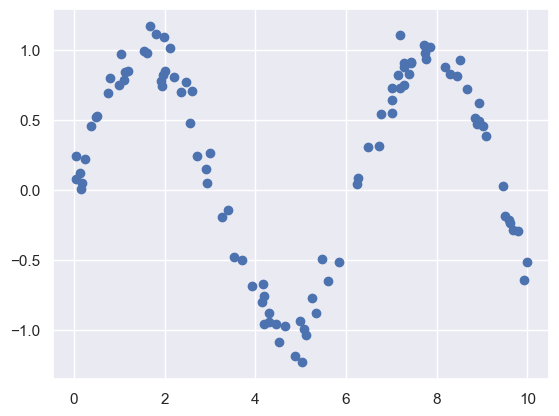

In [393]:
np.random.seed(666)

# Generamos 100 números aleatorios uniformemente distribuidos entre 0 y 10
x = 10 * np.random.rand(100)

# Generamos una variable de respuesta que no depende linealmente de x
y = np.sin(x) + 0.1 * np.random.randn(100)

# Graficamos los resultados
plt.scatter(x, y)

In [395]:
# .fit() ajustamos los datos al modelo.
# El pipeline recibe los datos x y genera variables polinomiales hasta grado 7
# Luego estima una regresión lineal para predecir y con las variables creadas antes de poliomios de grado 7

poly_model.fit(x.reshape(-1, 1), y) # Ajuste el modelo polinomial

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [407]:
x_teorico = np.linspace(0, 10, 1000)
y_hat = poly_model.predict(x_teorico.reshape(-1, 1)) 

In [410]:
# ¿Cómo extraigo un paso intermedio?
pd.DataFrame(poly_model['polynomialfeatures'].fit_transform(x_teorico.reshape(-1, 1)))

,0,1,2,3,4,5,6,7
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.01001,0.000100,0.000001,1.004010e-08,1.005015e-10,1.006021e-12,1.007028e-14
2,1.0,0.02002,0.000401,0.000008,1.606416e-07,3.216048e-09,6.438535e-11,1.288996e-12
3,1.0,0.03003,0.000902,0.000027,8.132481e-07,2.442187e-08,7.333893e-10,2.202370e-11
4,1.0,0.04004,0.001603,0.000064,2.570266e-06,1.029135e-07,4.120662e-09,1.649915e-10
...,...,...,...,...,...,...,...,...
995,1.0,9.95996,99.200802,988.036020,9.840799e+03,9.801397e+04,9.762152e+05,9.723064e+06
996,1.0,9.96997,99.400301,991.018018,9.880420e+03,9.850749e+04,9.821167e+05,9.791674e+06
997,1.0,9.97998,99.600000,994.006010,9.920160e+03,9.900300e+04,9.880479e+05,9.860699e+06
998,1.0,9.98999,99.799900,997.000002,9.960020e+03,9.950050e+04,9.940090e+05,9.930140e+06


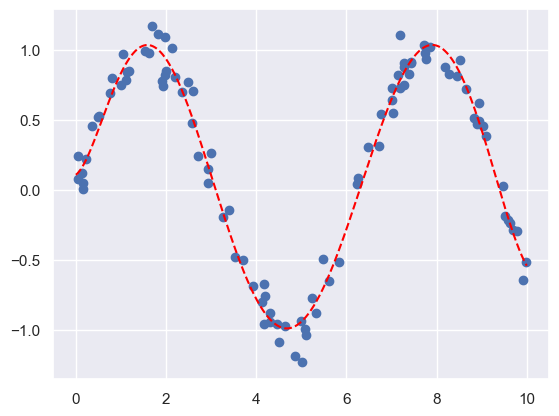

In [412]:
plt.scatter(x, y)
plt.plot(x_teorico, y_hat, color = "red", linestyle = "dashed")

Ahora volvamos a nuestro ejemplo en Boston y tratemos de encontrar el polinomio adecuado para expresar la relación entre precio de la vivienda y porcentaje de pobres.

In [413]:
# Definimos una función para el pipeline de la regresion polinomial
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [417]:
PolynomialRegression()

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

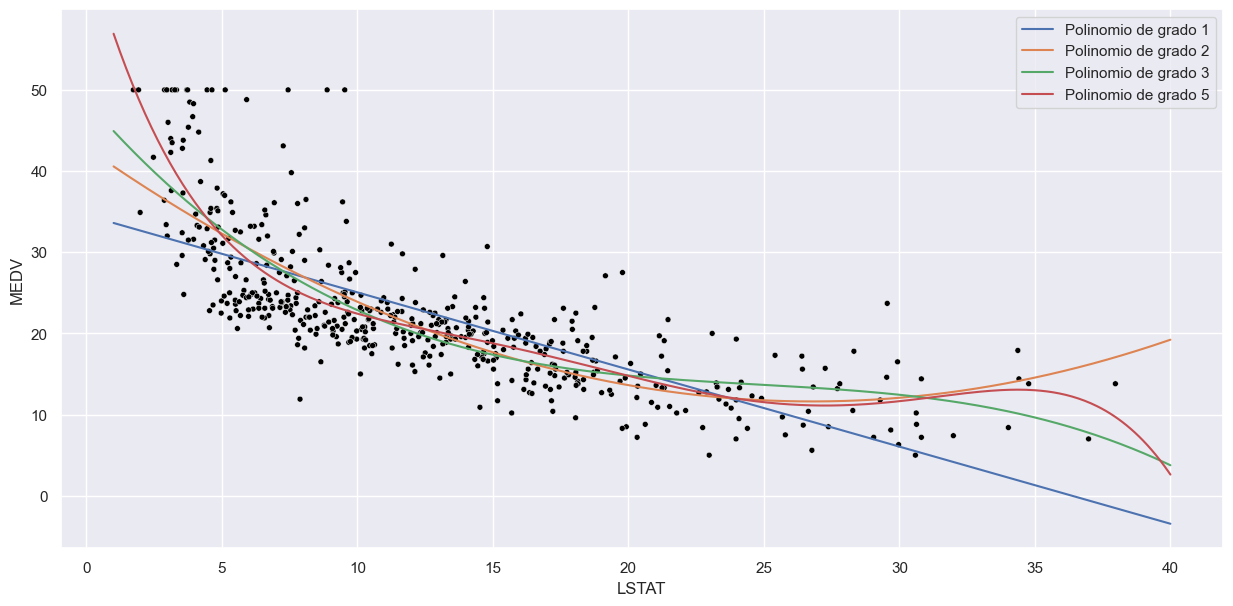

In [443]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.scatterplot(data = boston, x = "LSTAT", y = "MEDV", color = 'black', size = 5, ax = ax, legend = False)

X_test = pd.DataFrame({"LSTAT": np.linspace(1, 40, boston.shape[0])})
for degree in [1, 2, 3, 5]:
    y_test = PolynomialRegression(degree).fit(boston[["LSTAT"]], boston[["MEDV"]]).predict(X_test)
    sns.lineplot(x = X_test["LSTAT"], y = y_test[:, 0], label = 'Polinomio de grado {}'.format(degree), ax = ax)

plt.legend(loc='best')

¿Cómo hacemos para escoger el grado del polinomio? Podemos hacer una grilla de diferentes opciones, probarlas todas, evaluarlas y quedarnos con la mejor opción. Para hacer esto debemos dividir nuestra base de datos en un conjunto de entrenamiento y en otro de testeo. Algunas razones que justifican esta partición son las siguientes:

1. Para medir la capacidad de generalización del modelo: El objetivo de entrenar un modelo es hacer predicciones precisas sobre nuevos datos que no se han visto antes. La división en conjuntos de entrenamiento y prueba permite evaluar la capacidad de un modelo para generalizar a nuevos datos. Si el modelo se ajusta demasiado a los datos de entrenamiento y no se generaliza bien a los datos de prueba, se dice que hay sobreajuste (overfitting).

2. Para evitar el sesgo en la evaluación del modelo: Si se utiliza el mismo conjunto de datos para entrenar y evaluar un modelo, el modelo puede ajustarse a los patrones específicos de los datos de entrenamiento, lo que puede conducir a una evaluación sesgada del modelo. Al dividir los datos en conjuntos de entrenamiento y prueba, se puede evaluar el modelo de manera objetiva en un conjunto de datos independiente que no se ha utilizado para entrenar el modelo.

3. Para ajustar los hiperparámetros del modelo: En el proceso de entrenamiento de un modelo, se pueden ajustar ciertos parámetros (llamados hiperparámetros) que no se aprenden automáticamente del conjunto de datos. La división en conjuntos de entrenamiento y prueba permite ajustar los hiperparámetros en el conjunto de entrenamiento y evaluar el rendimiento del modelo en el conjunto de prueba para elegir los mejores hiperparámetros.

En este caso vamos a hacer algo mucho más sofisticado y es hacer un proceso llamado Cross Validation.

### K-Fold Cross Validation

La técnica de Cross Validation implica dividir los datos en $k$ partes iguales (conocidas como k-folds), donde k es un número predeterminado. Luego, se entrena el modelo en $k-1$ de estas partes y se prueba en la parte restante. Este proceso se repite $k$ veces, de manera que cada parte se utiliza como conjunto de prueba una vez. Los resultados de las $k$ iteraciones se promedian para dar una medida general del rendimiento del modelo.

La técnica de Cross Validation ayuda a prevenir el sobreajuste, ya que evalúa el rendimiento del modelo en datos no utilizados en el entrenamiento, lo que ayuda a identificar problemas de generalización. Además, la técnica puede ayudar a seleccionar el mejor modelo o conjunto de hiperparámetros, ya que se pueden comparar los resultados de diferentes modelos y ajustes de parámetros utilizando los mismos conjuntos de datos.

<center>
<img src = "img/KFCV.png" width = 400>
</center>

En ese orden de ideas vamos a probar 21 modelos, desde el polinomio 0 hasta el polinomio de grado 20 para definir cuál es el mejor grado para predecir nuestros datos. Para hacer esto, cada modelo se va a entrenar 10 veces con diferentes muestras y se va a sacar una métrica de error promedio. Al final, escogeremos el modelo con mejor resultado.

In [444]:
# Importamos la función validation_curve del módulo model_selection
from sklearn.model_selection import validation_curve

In [446]:
# Vamos a evaluar de 0 a grado 20 en los polinomios
degree = np.arange(0, 21)

# Definimos la curva de validación indicando la función que queremos calibrar 
# (la función de regresión polinomial que creamos antes)
# los datos X y y, el parámetro que queremos calibrar 
# (nombre de la funcion__parametro), los valores que queremos probar y el número de cortes de la validación cruzada
train_score, val_score = validation_curve(estimator = PolynomialRegression(), 
                                          X = boston[["LSTAT"]], 
                                          y = boston[["MEDV"]],
                                          param_name = "polynomialfeatures__degree", 
                                          param_range = degree, 
                                          cv = 10)

In [448]:
train_score.shape

(21, 10)

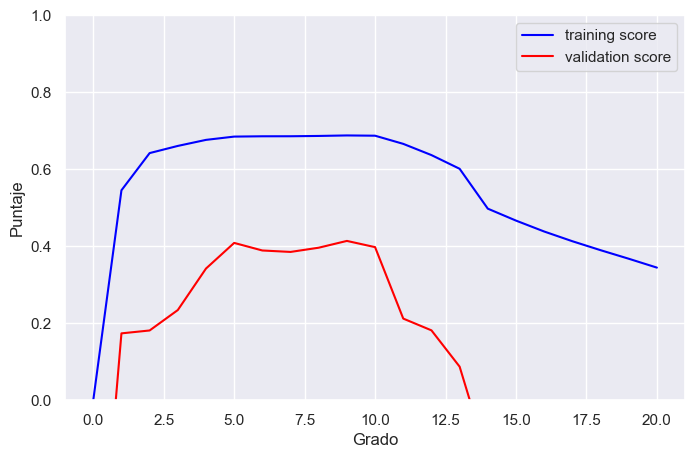

In [453]:
# Grafiquemos el resultado
fig, ax = plt.subplots(figsize = (8,5))
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

¿Qué significa que el puntaje de train haya sido más alto que el de validación?

Valores del parámetro (eje x) en los que el score de entrenamiento es alto y el error de prueba es bajo (como grados polinomiales > 10) indican un sobre ajuste del modelo. La idea es buscar el punto donde ambos score sean altos y la distancia entre ellos sea la menor posible.

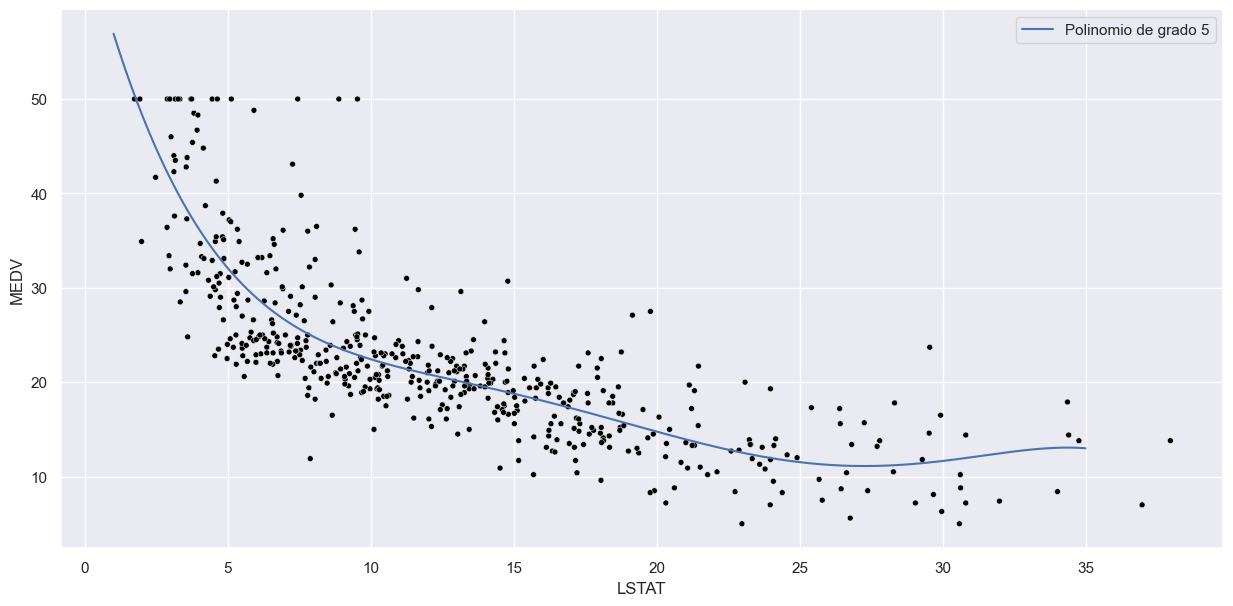

In [457]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.scatterplot(data = boston, x = "LSTAT", y = "MEDV", color = 'black', size = 5, ax = ax, legend = False)

X_test = pd.DataFrame({"LSTAT": np.linspace(1, 35, boston.shape[0])})
degree = 5
y_test = PolynomialRegression(degree).fit(boston[["LSTAT"]], boston[["MEDV"]]).predict(X_test)
sns.lineplot(x = X_test["LSTAT"], y = y_test[:, 0], label = 'Polinomio de grado {}'.format(degree), ax = ax)
plt.legend(loc='best')